In [12]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.Resize(320),
                                transforms.CenterCrop(320),
                                transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])
X = datasets.ImageFolder('./datasets/X/', transform=transform)
X_dataloader = torch.utils.data.DataLoader(X,
                                           batch_size=16,
                                           shuffle=False)
class Improver(torch.nn.Module):
    def __init__(self):
        super(Improver, self).__init__()
        self.fc1 = torch.nn.Linear(320 * 320, 1024)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(1024, 512)
        self.ac2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(512, 320 * 320)
        self.ac3 = torch.nn.Tanh()

    def forward(self, x):
        x = x.view(-1, 320 * 320)
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = x.view(-1, 1, 320, 320)
        x = self.ac3(x)
        return x



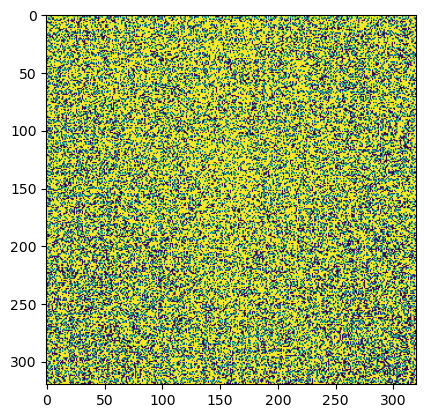

In [13]:
model = torch.load('Generator_epoch_9.pth', map_location='cpu')
for images, labels in X_dataloader:
    plt.imshow(model(images[0]).detach().numpy().squeeze())